#Predicting Life Expectancy Based on Virginia Health Opportunity Index
---
###Bryant Chow, Josh De Vera, Tony Le
###CS 4774
###Professor Nguyen
###Guiding TA: Emery Shelly






## Project Abstract
The purpose of this experiment is to use the Health Opportunity Index to predict life expectancy and identify which socio-economic factors as well as public facilities affect the overall life expectancy within VA. We can then use this data to 1) help areas with lower life expectancies and 2) see which features affect life expectancy the most to guide public policy. There have already been a few projects which have tackled this, but what makes our project different is our second point. The National Institute of Health (NIH) has done a similar study which looks at Ohio and tests the validity of the Health Opportunity Index (HOI) and its ability to predict life expectancy. It found that the HOI has a strong correlation with life expectancy. They tested their model on the following years’ HOI and it was able to accurately predict the life expectancy of a county. We can use similar techniques and compare our Virginia data set error to that of Ohio to make sure our model works accurately. One limitation of the Ohio data set was the lack of data from rural areas, but the data set we found has a considerable amount of data on rural areas so we can try to make an even more accurate model with data from Virginia’s rural counties.


# Data Sets Combined fot this project:

VA Health Opportunity Index: https://data.virginia.gov/Family-Health/Health-Opportunity-Index/6q6u-dcz7

VA Life Expectancy:
https://data.virginia.gov/Health/Open-View-VA-Census-Tract-Life-Expectancy/pdsy-56sx

US Census ID Forms:
https://www.fcc.gov/general/form-477-census-tract-information


# Data Set Merging
To create the single data set for this project, I used the US Census ID dataset and cross-referenced it with the Va Life Expectancy data set since each data point was identified with their Census ID Number. Then, I cross-referenced that data with the VA Health Opportunity Index Dataset using the Census Tract Number which isn't on the US Census ID dataset. The final dataset contains the each counties Census Tract number, the features that are accounted in the Health Opportunity Index, the Health Opportunity Index score, and the life expectancy.


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

hoi = pd.read_csv('Health_Opportunity_Index.csv')
lifeExp = pd.read_csv('Open_View_-_VA_Census_Tract_Life_Expectancy.csv')

In [ ]:
hoi.head()

,Census Tract,Rural~Urban,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,Job Participation,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index
0,51650011400,Urban,0.486042,0.015251,0.043043,0.730782,0.468193,0.630734,0.977517,0.034818,0.150,0.043334,0.770141,0.000000,0.245825,0.540012,0.390787,0.006034,0.409863,0.000000
1,51760040300,Urban,0.502987,0.042804,0.641642,0.351528,0.022901,0.871575,0.933302,0.082321,0.373,0.227476,0.639438,0.133458,0.307647,0.777319,0.764695,0.033064,0.488495,0.015558
2,51013101701,Urban,0.432198,0.131224,0.627628,0.800711,0.513995,0.853716,0.933302,0.395412,0.759,1.000000,0.801044,0.343863,0.731265,1.000000,0.827284,0.326435,0.355932,0.032861
3,51710002500,Urban,0.465814,0.041683,0.021021,0.754040,0.444020,0.697862,0.741324,0.258974,0.436,0.113065,0.919320,0.228861,0.321052,0.561143,0.302549,0.183497,0.319484,0.077873
4,51760040400,Urban,0.502987,0.084305,0.662663,0.382158,0.427481,0.800714,0.933302,0.000000,0.551,0.231267,0.822681,0.184284,0.326225,0.719178,0.773519,0.075911,0.395098,0.085121


In [ ]:
lifeExp.head()

,State,Locality,FIPS,Census Tract Number,Life Expectancy,Life Expectancy Standard Error
0,Virginia,(blank),51000,NaN,79.4,0.0250
1,Virginia,Accomack County,51001,901.0,74.5,1.5145
2,Virginia,Accomack County,51001,902.0,77.5,1.1577
3,Virginia,Accomack County,51001,903.0,76.1,3.4158
4,Virginia,Accomack County,51001,904.0,77.7,1.2010


In [ ]:
#Method to remove trailing 0 in tract number and remove the decimal to only leave the digits
def convertTract(num):
  numStr = str(num)
  if numStr[-1] == "0":
    numStr = numStr[0:len(numStr)-1]
  numStr = numStr.replace('.','')
  return numStr

In [ ]:
#Drop any rows with NaN values and resets the index afterwards
lifeExp = lifeExp.dropna()
lifeExp = lifeExp.reset_index(drop = True)

In [ ]:
#Creates a new column with the census tract digits as strings
tempArray = []
for i in range(len(lifeExp)):
  s = convertTract(lifeExp['Census Tract Number'][i])
  tempArray.append(s)

lifeExp['Census Tract Number Digits'] = tempArray

In [ ]:
#Creates a new column with the full FIPS codes
tempArray = []
for i in range(len(lifeExp)):
  fips = str(lifeExp['FIPS'][i])
  fips = fips + '000000'

  fipsCode = int(fips) + int(lifeExp['Census Tract Number Digits'][i])
  tempArray.append(fipsCode)

lifeExp['Census Tract'] = tempArray

In [ ]:
#Merge the 2 datasets based on the census tract fips codes they have in common
fullData = pd.merge(hoi, lifeExp, on='Census Tract')

In [ ]:
fullData.drop(['FIPS','Census Tract Number','Life Expectancy Standard Error', 'Census Tract Number Digits'], axis = 1, inplace = True)

In [ ]:
fullData

,Census Tract,Rural~Urban,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,...,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index,State,Locality,Life Expectancy
0,51013101403,Urban,0.466760,0.122853,0.660661,0.783266,0.582697,0.902432,0.933302,0.475169,...,0.386328,0.966011,0.979486,0.880676,0.346453,0.370990,0.091417,Virginia,Arlington County,80.7
1,51121020201,Urban,0.371854,0.079464,0.192192,0.889298,0.432570,0.892324,0.996297,0.251282,...,0.284302,0.233945,0.541058,0.609358,0.177157,0.281539,0.167349,Virginia,Montgomery County,78.9
2,51013101802,Urban,0.434747,0.131422,0.708709,0.767906,0.659033,0.888723,0.933302,0.475709,...,0.302523,0.598746,0.837732,0.828389,0.361443,0.375004,0.191628,Virginia,Arlington County,80.9
3,51013101702,Urban,0.417921,0.124969,0.678679,0.709216,0.676845,0.858297,0.933302,0.336572,...,0.244075,0.656096,0.751125,0.789080,0.291615,0.344019,0.200976,Virginia,Arlington County,80.9
4,51191010502,Urban,0.370109,0.068883,0.182182,0.837608,0.685751,0.670669,0.942139,0.256410,...,0.299769,0.153523,0.407921,0.453114,0.174846,0.235938,0.204015,Virginia,Washington County,72.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,51550021011,Urban,0.389754,0.122914,0.690691,0.943812,0.912214,0.808100,0.980990,0.624696,...,0.622355,0.162683,0.239709,0.724436,0.360059,0.590709,0.613450,Virginia,City of Chesapeake,79.5
857,51059431002,Urban,0.500215,0.142495,0.693694,0.921067,0.949109,0.820499,0.933302,0.660054,...,0.615473,0.143828,0.270243,0.710679,0.420954,0.531661,0.625536,Virginia,Fairfax County,80.9
858,51153901233,Urban,0.653177,0.123813,0.707708,0.875726,0.909669,0.792357,0.963917,0.613900,...,0.709124,0.148771,0.249682,0.759295,0.372530,0.621149,0.631906,Virginia,Prince William County,79.8
859,51153901005,Urban,0.661008,0.140759,0.681682,0.793776,0.891858,0.824851,0.982599,0.636707,...,0.692808,0.124491,0.276896,0.766127,0.390717,0.601810,0.634309,Virginia,Prince William County,80.4


In [ ]:
#Here is the code for the data and actual project

Crunched on time, heres the code to start a simple linear regression, we can organize it later

In [ ]:
fullData.corr()

,Census Tract,Access to Care,Employment Accessibility,Affordability,Air Quality,Population Churning,Education,Food Accessibility,Income Inequality,Job Participation,Population Density,Segregation,Material Deprivation,Walkability,Community Environment Profile,Consumer Opportunity Profile,Economic Opportunity Profile,Wellness Disparity Profile,Health Opportunity Index,Life Expectancy
Census Tract,1.000000,-0.101553,0.217050,-0.274574,-0.095797,-0.288376,-0.173096,-0.059004,-0.030739,-0.044878,0.053454,-0.028051,-0.212761,0.286851,0.225648,-0.272304,0.076913,-0.054204,-0.242221,-0.275855
Access to Care,-0.101553,1.000000,0.174927,0.102286,-0.241885,-0.024942,0.155219,0.047246,0.009472,0.181788,0.099365,0.004721,-0.000611,0.103322,0.133512,0.153253,0.149467,0.721690,0.258817,0.127604
Employment Accessibility,0.217050,0.174927,1.000000,0.148547,-0.205619,-0.124648,0.205088,0.040581,0.315512,0.578782,0.252585,0.054193,0.021448,0.313642,0.271898,0.012975,0.742027,0.089301,0.233853,0.113947
Affordability,-0.274574,0.102286,0.148547,1.000000,0.147145,0.301555,0.720131,0.236850,0.371452,0.323145,0.078537,0.063837,0.607648,0.082831,-0.132742,0.849763,0.268344,0.029963,0.581156,0.646233
Air Quality,-0.095797,-0.241885,-0.205619,0.147145,1.000000,0.237880,-0.001716,0.030507,0.080957,-0.198527,-0.293198,-0.000969,0.299885,-0.310749,-0.524040,0.094587,-0.003314,-0.174685,0.262918,0.015143
Population Churning,-0.288376,-0.024942,-0.124648,0.301555,0.237880,1.000000,0.056493,0.087803,0.140384,-0.114245,-0.323118,0.028417,0.508192,-0.424650,-0.657965,0.314793,-0.009998,-0.037753,0.586541,0.158760
Education,-0.173096,0.155219,0.205088,0.720131,-0.001716,0.056493,1.000000,0.222487,0.145495,0.283563,0.200327,0.039245,0.494881,0.315842,0.151846,0.850497,0.120426,0.085361,0.343976,0.656399
Food Accessibility,-0.059004,0.047246,0.040581,0.236850,0.030507,0.087803,0.222487,1.000000,0.117935,0.110582,0.002299,0.091104,0.196838,0.063371,-0.009147,0.501222,-0.061523,-0.028813,0.175768,0.237864
Income Inequality,-0.030739,0.009472,0.315512,0.371452,0.080957,0.140384,0.145495,0.117935,1.000000,0.409413,0.030091,0.043823,0.352046,-0.028158,-0.201656,0.157814,0.787819,-0.023469,0.554829,0.185906
Job Participation,-0.044878,0.181788,0.578782,0.323145,-0.198527,-0.114245,0.283563,0.110582,0.409413,1.000000,0.386398,0.068581,-0.013987,0.353069,0.354718,0.179280,0.743948,0.084316,0.230974,0.237451


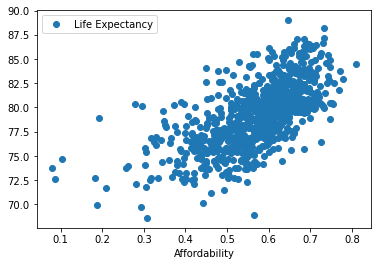

In [ ]:
fullData.plot(x="Affordability", y="Life Expectancy", style="o")

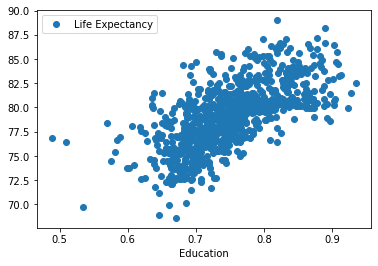

In [ ]:
fullData.plot(x="Education", y="Life Expectancy", style="o")

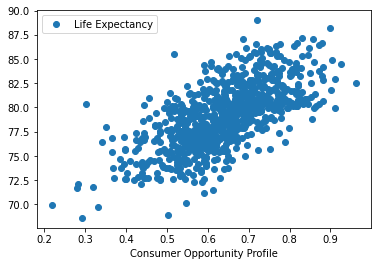

In [ ]:
fullData.plot(x="Consumer Opportunity Profile", y="Life Expectancy", style="o")

In [ ]:
fullData.drop(['Census Tract'], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fullData, test_size=0.2, random_state=42)

train_labels = train_set['Life Expectancy']
test_labels = test_set['Life Expectancy']

train_set = train_set.drop(['Life Expectancy'], axis = 1)
test_set = test_set.drop(['Life Expectancy'], axis = 1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_training = train_set._get_numeric_data()
numeric_columns = num_training.columns
cat_training = train_set.drop(numeric_columns, axis = 1)

num_pipeline = Pipeline([
        ('imputer', SimpleImputer()),
        ('std_scaler', StandardScaler()),
    ])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(num_training)
cat_attribs = list(cat_training)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.transform(test_set)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

lin_pred = lin_reg.predict(test_prepared)
mean_squared_error(test_labels, lin_pred)

5.334781473847382

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)
print("Scores:", lin_rmse_scores)
print("Mean RMSE:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [2.6518325  2.50999144 2.29471603 2.30367589 2.50364828]
Mean RMSE: 2.452772829082511
Standard deviation: 0.13616084734967435


Text(0.5, 1.0, 'Linear Regressor Prediction')

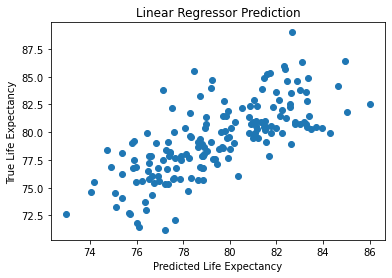

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(lin_pred, test_labels)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("True Life Expectancy")
plt.title("Linear Regressor Prediction")

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean RMSE:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [2.99406418 3.48834498 3.45801945 3.28995374 3.33024188]
Mean RMSE: 3.3121248462669315
Standard deviation: 0.1756821836537344


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
print("Scores:", tree_rmse_scores)
print("Mean RMSE:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [2.99406418 3.48834498 3.45801945 3.28995374 3.33024188]
Mean RMSE: 3.3121248462669315
Standard deviation: 0.1756821836537344


In [ ]:
tree_pred = tree_reg.predict(test_prepared)

(70.0, 90.0)

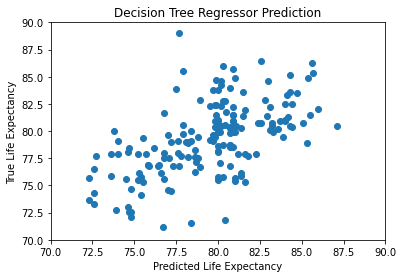

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(tree_pred, test_labels)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("True Life Expectancy")
plt.title("Decision Tree Regressor Prediction")
plt.xlim([70, 90])
plt.ylim([70, 90])

Random Forest Regressor

In [ ]:
#For Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [ ]:
random_forest_pred = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(test_labels,random_forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.1723752829431167

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
print("Scores:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [2.41143299 2.34655256 2.28742723 2.21720675 2.47893222]
Mean RMSE: 2.348310347027794
Standard deviation: 0.09159098094365435


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [1, 2, 3, 4, 5, 6, 7 ,8, 9 , 10, 11, 12, 13, 14, 15, 20, 25, 50, 75, 100], 'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 21]}
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                           21],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 20, 25, 50, 75,
                                           100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 100}

In [ ]:
#For Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, max_features=12, random_state=42)
forest_reg.fit(train_prepared, train_labels)

RandomForestRegressor(max_features=12, random_state=42)

In [ ]:
random_forest_pred = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(test_labels,random_forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.1631659334159603

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
print("Scores:", forest_rmse_scores)
print("Mean RMSE:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [2.41966412 2.26891582 2.23511756 2.09915495 2.34992757]
Mean RMSE: 2.274556006468262
Standard deviation: 0.10871059704021316


(70.0, 90.0)

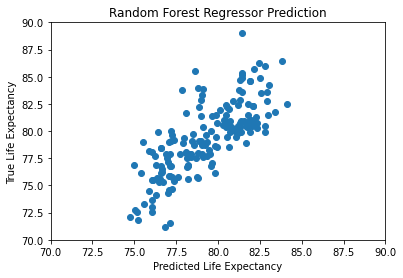

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(random_forest_pred, test_labels)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("True Life Expectancy")
plt.title("Random Forest Regressor Prediction")
plt.xlim([70, 90])
plt.ylim([70, 90])

XGBooster Regression

In [ ]:
import xgboost as xgb

xgboost_reg = xgb.XGBRegressor(objective="reg:squarederror",booster='gbtree', random_state=42)
xgboost_reg.fit(train_prepared, train_labels)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
xgb_pred = xgboost_reg.predict(test_prepared)
xgb_mse = mean_squared_error(test_labels,xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

2.105799488625408

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgboost_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
xgboost_rmse_scores = np.sqrt(-scores)
print("Scores:", xgboost_rmse_scores)
print("Mean RMSE:", xgboost_rmse_scores.mean())
print("Standard deviation:", xgboost_rmse_scores.std())

Scores: [2.40006641 2.3419438  2.28706753 2.17596788 2.48450782]
Mean RMSE: 2.337910688484338
Standard deviation: 0.10409689782200965


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'objective':["reg:squarederror"],
     'n_estimators': [1, 2, 3, 4, 5, 6, 7 ,8, 9 , 10, 11, 12, 13, 14, 15, 20,
                      25, 30, 35, 40,45,50,55,60,65,70, 75,80,85,90,95,100],
     'max_depth': [3,4,5,6,7,8,9,10],
     'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25]}
  ]

xgboost_reg = xgb.XGBRegressor(booster='gbtree', random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(xgboost_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=XGBRegressor(random_state=42),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 20, 25, 30, 35, 40,
                                           45, 50, 55, 60, 65, 70, 75, 80, 85,
                                           90, ...],
                          'objective': ['reg:squarederror']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 70,
 'objective': 'reg:squarederror'}

In [ ]:
import xgboost as xgb

xgboost_reg = xgb.XGBRegressor(objective="reg:squarederror",
                               learning_rate=0.1, max_depth=3,
                               booster='gbtree', n_estimators=70, random_state=42)
xgboost_reg.fit(train_prepared, train_labels)

XGBRegressor(n_estimators=70, objective='reg:squarederror', random_state=42)

In [ ]:
xgb_pred = xgboost_reg.predict(test_prepared)
xgb_mse = mean_squared_error(test_labels,xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

2.1255615081945898

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgboost_reg, train_prepared, train_labels,
                         scoring="neg_mean_squared_error", cv=5)
xgboost_rmse_scores = np.sqrt(-scores)
print("Scores:", xgboost_rmse_scores)
print("Mean RMSE:", xgboost_rmse_scores.mean())
print("Standard deviation:", xgboost_rmse_scores.std())

Scores: [2.35864995 2.33069122 2.252131   2.14921233 2.47792653]
Mean RMSE: 2.313722206299127
Standard deviation: 0.10965991623451203


(70.0, 90.0)

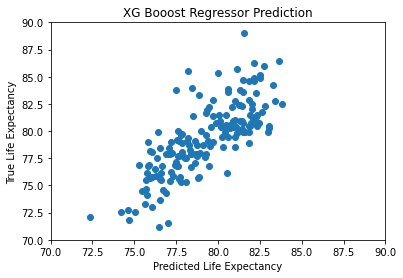

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(xgb_pred, test_labels)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("True Life Expectancy")
plt.title("XG Booost Regressor Prediction")
plt.xlim([70, 90])
plt.ylim([70, 90])

In [ ]:
xgboost_reg.get_booster().get_score(importance_type='gain')


{'f14': 99.04931519791666,
 'f5': 119.47350796599996,
 'f2': 75.39698975857141,
 'f6': 14.936761535,
 'f54': 71.33808055555555,
 'f17': 15.149965603333333,
 'f16': 15.111392189166667,
 'f10': 19.242453636875002,
 'f1': 12.127846798651424,
 'f0': 21.254073971350355,
 'f81': 22.3950195,
 'f7': 18.711493323333332,
 'f8': 18.7507201725,
 'f37': 21.0273438,
 'f15': 21.427869916000002,
 'f12': 24.924772024,
 'f80': 30.991699195000002,
 'f3': 20.99609412473684,
 'f46': 16.007297995000002,
 'f70': 28.33278162857143,
 'f9': 20.192418381176466,
 'f4': 19.631354212142856,
 'f41': 16.865134775714285,
 'f11': 21.962671158,
 'f13': 31.37685776666667,
 'f50': 16.0137634,
 'f68': 13.036385866666668,
 'f18': 12.211205,
 'f43': 11.74209095,
 'f24': 22.986412,
 'f34': 19.1548805}